In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ask
1. What category is preferred the most.
2. What factors are responsible for higher app rating by coutomers.
3. What features can be added to a educational app to engage more teen students.
4. What kind of apps should target adults.
4. What are the top 5 paid apps in terms of rating and installs.

## Prepare

In [2]:
df=pd.read_csv("../input/google-playstore-apps/Google-Playstore.csv")

In [3]:
df.head(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
df.shape

(2312944, 24)

In [5]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

## Process

In [7]:
for col in df.columns:
    col1 = col.replace(' ','')
    df = df.rename(columns={col:col1})
df.columns

Index(['AppName', 'AppId', 'Category', 'Rating', 'RatingCount', 'Installs',
       'MinimumInstalls', 'MaximumInstalls', 'Free', 'Price', 'Currency',
       'Size', 'MinimumAndroid', 'DeveloperId', 'DeveloperWebsite',
       'DeveloperEmail', 'Released', 'LastUpdated', 'ContentRating',
       'PrivacyPolicy', 'AdSupported', 'InAppPurchases', 'EditorsChoice',
       'ScrapedTime'],
      dtype='object')

In [8]:
print("Columns containing the missing values")
df.isnull().any()

Columns containing the missing values


AppName              True
AppId               False
Category            False
Rating               True
RatingCount          True
Installs             True
MinimumInstalls      True
MaximumInstalls     False
Free                False
Price               False
Currency             True
Size                 True
MinimumAndroid       True
DeveloperId          True
DeveloperWebsite     True
DeveloperEmail       True
Released             True
LastUpdated         False
ContentRating       False
PrivacyPolicy        True
AdSupported         False
InAppPurchases      False
EditorsChoice       False
ScrapedTime         False
dtype: bool

In [9]:
print("Number of rows having null values in the dataset:")
missing_info = (len(df[df.isnull().any(axis=1)]) / len(df) )*100
print(len(df[df.isnull().any(axis=1)]),' which is ' ,round(missing_info,2) , '%')


Number of rows having null values in the dataset:
1025753  which is  44.35 %


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   AppName           object 
 1   AppId             object 
 2   Category          object 
 3   Rating            float64
 4   RatingCount       float64
 5   Installs          object 
 6   MinimumInstalls   float64
 7   MaximumInstalls   int64  
 8   Free              bool   
 9   Price             float64
 10  Currency          object 
 11  Size              object 
 12  MinimumAndroid    object 
 13  DeveloperId       object 
 14  DeveloperWebsite  object 
 15  DeveloperEmail    object 
 16  Released          object 
 17  LastUpdated       object 
 18  ContentRating     object 
 19  PrivacyPolicy     object 
 20  AdSupported       bool   
 21  InAppPurchases    bool   
 22  EditorsChoice     bool   
 23  ScrapedTime       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memory usage: 361.8+ MB


In [11]:
df.isnull().sum()

AppName                  2
AppId                    0
Category                 0
Rating               22883
RatingCount          22883
Installs               107
MinimumInstalls        107
MaximumInstalls          0
Free                     0
Price                    0
Currency               135
Size                   196
MinimumAndroid        6530
DeveloperId             33
DeveloperWebsite    760835
DeveloperEmail          31
Released             71053
LastUpdated              0
ContentRating            0
PrivacyPolicy       420953
AdSupported              0
InAppPurchases           0
EditorsChoice            0
ScrapedTime              0
dtype: int64

In [12]:
df.dropna(subset=["Size","MinimumInstalls","AppName","Installs"],inplace=True)
df.isnull().sum()

AppName                  0
AppId                    0
Category                 0
Rating               22581
RatingCount          22581
Installs                 0
MinimumInstalls          0
MaximumInstalls          0
Free                     0
Price                    0
Currency                28
Size                     0
MinimumAndroid        6530
DeveloperId             33
DeveloperWebsite    760733
DeveloperEmail          31
Released             70758
LastUpdated              0
ContentRating            0
PrivacyPolicy       420880
AdSupported              0
InAppPurchases           0
EditorsChoice            0
ScrapedTime              0
dtype: int64

Now lets clean *content rating* column

In [13]:
df["ContentRating"].value_counts()

Everyone           2021869
Teen                196318
Mature 17+           60280
Everyone 10+         33883
Unrated                154
Adults only 18+        136
Name: ContentRating, dtype: int64

In [14]:
df["ContentRating"]=df["ContentRating"].replace("Unrated","Everyone")
df["ContentRating"]=df["ContentRating"].replace("Everyone 10+","Everyone")
df["ContentRating"]=df["ContentRating"].replace("Adults only 18+","Adults")

Now lets clean *Install* column

In [15]:
df.Installs = df.Installs.str.replace(',','')
df.Installs = df.Installs.str.replace('+','')
df.Installs = df.Installs.str.replace('Free','0')
df['Installs'] = pd.to_numeric(df['Installs'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Now lets clean *Price* column

In [16]:
df['PriceRange'] = pd.cut(df['Price'],bins=[0,0.19,9.99,29.99,410],labels=['Free','Low','Mid','High'],include_lowest=True)
df['PriceRange'].value_counts()

Free    2267708
Low       41968
Mid        2092
High        872
Name: PriceRange, dtype: int64

Now lets clean *Free* column and combine them in *Type*

In [17]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],inplace=True,axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312640 entries, 0 to 2312943
Data columns (total 25 columns):
 #   Column            Dtype   
---  ------            -----   
 0   AppName           object  
 1   AppId             object  
 2   Category          object  
 3   Rating            float64 
 4   RatingCount       float64 
 5   Installs          int64   
 6   MinimumInstalls   float64 
 7   MaximumInstalls   int64   
 8   Price             float64 
 9   Currency          object  
 10  Size              object  
 11  MinimumAndroid    object  
 12  DeveloperId       object  
 13  DeveloperWebsite  object  
 14  DeveloperEmail    object  
 15  Released          object  
 16  LastUpdated       object  
 17  ContentRating     object  
 18  PrivacyPolicy     object  
 19  AdSupported       bool    
 20  InAppPurchases    bool    
 21  EditorsChoice     bool    
 22  ScrapedTime       object  
 23  PriceRange        category
 24  Type              object  
dtypes: bool(3), catego

In [19]:
df["Type"].value_counts()

Free    2267680
Paid      44960
Name: Type, dtype: int64

Now lets clean *rating* column

In [20]:
df['RatingType'] = 'NoRatingProvided'
df.loc[(df['RatingCount'] > 0) & (df['RatingCount'] <= 10000.0),'RatingType'] = 'Less than 10K'
df.loc[(df['RatingCount'] > 10000) & (df['RatingCount'] <= 500000.0),'RatingType'] = 'Between 10K and 500K'
df.loc[(df['RatingCount'] > 500000) & (df['RatingCount'] <= 138557570.0),'RatingType'] = 'More than 500K'
df.RatingType.value_counts()

Less than 10K           1192853
NoRatingProvided        1082343
Between 10K and 500K      35779
More than 500K             1665
Name: RatingType, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312640 entries, 0 to 2312943
Data columns (total 26 columns):
 #   Column            Dtype   
---  ------            -----   
 0   AppName           object  
 1   AppId             object  
 2   Category          object  
 3   Rating            float64 
 4   RatingCount       float64 
 5   Installs          int64   
 6   MinimumInstalls   float64 
 7   MaximumInstalls   int64   
 8   Price             float64 
 9   Currency          object  
 10  Size              object  
 11  MinimumAndroid    object  
 12  DeveloperId       object  
 13  DeveloperWebsite  object  
 14  DeveloperEmail    object  
 15  Released          object  
 16  LastUpdated       object  
 17  ContentRating     object  
 18  PrivacyPolicy     object  
 19  AdSupported       bool    
 20  InAppPurchases    bool    
 21  EditorsChoice     bool    
 22  ScrapedTime       object  
 23  PriceRange        category
 24  Type              object  
 25  RatingType        

## Analyze

In [22]:
print('Top 3 choices of teens')
adultTopChoices = df.loc[(df.ContentRating == 'Teen')]
adultTopChoices.sort_values(by='MaximumInstalls',ascending=False).head(5)

Top 3 choices of teens


,AppName,AppId,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Price,Currency,...,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases,EditorsChoice,ScrapedTime,PriceRange,Type,RatingType
881403,YouTube,com.google.android.youtube,Video Players & Editors,4.4,112440547.0,5000000000,5.000000e+09,9766230924,0.0,USD,...,"Jun 16, 2021",Teen,http://www.google.com/policies/privacy,True,False,False,2021-06-16 10:28:37,Free,Free,More than 500K
2222701,Facebook,com.facebook.katana,Social,2.3,117850066.0,5000000000,5.000000e+09,6782619635,0.0,USD,...,"Jun 16, 2021",Teen,https://www.facebook.com/about/privacy/,True,True,False,2021-06-16 11:40:20,Free,Free,More than 500K
167781,Google TV (previously Play Movies & TV),com.google.android.videos,Video Players & Editors,4.0,1825673.0,5000000000,5.000000e+09,6156518915,0.0,USD,...,"Jun 14, 2021",Teen,http://www.google.com/policies/privacy,False,False,False,2021-06-15 23:07:22,Free,Free,More than 500K
1643722,Google Play Games,com.google.android.play.games,Entertainment,4.3,12016421.0,1000000000,1.000000e+09,4605543029,0.0,USD,...,"Apr 26, 2021",Teen,http://www.google.com/policies/privacy,False,False,False,2021-06-16 03:24:06,Free,Free,More than 500K
1108596,Currents,com.google.android.apps.plus,Social,4.0,6359366.0,1000000000,1.000000e+09,3929716163,0.0,USD,...,"Jun 07, 2021",Teen,http://www.google.com/policies/privacy,False,False,False,2021-06-16 14:03:43,Free,Free,More than 500K


In [23]:
print("These 3 are the top 3 apps preferred by teens in educational category")
EdMillionIns=df.loc[(df.Category == 'Education') & (df.ContentRating == 'Teen')]
EdMillionIns.sort_values(by='MaximumInstalls',ascending=False ).head(3)

These 3 are the top 3 apps preferred by teens in educational category


,AppName,AppId,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Price,Currency,...,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases,EditorsChoice,ScrapedTime,PriceRange,Type,RatingType
829069,Cake - Learn English for Free,me.mycake,Education,4.8,735158.0,50000000,50000000.0,69941784,0.0,USD,...,"Jun 01, 2021",Teen,https://resource.mycake.me/res/privacy_en.html,True,False,False,2021-06-16 09:39:23,Free,Free,More than 500K
852875,MEB E-OKUL VBS,com.meb.vbsmobil,Education,2.6,293119.0,10000000,10000000.0,32462856,0.0,USD,...,"Jun 18, 2020",Teen,http://www.meb.gov.tr,False,False,False,2021-06-16 10:01:53,Free,Free,Between 10K and 500K
356801,Hindi English Translator - English Dictionary,com.hindi.english.translate.language.word.dict...,Education,4.2,44998.0,10000000,10000000.0,22674157,0.0,USD,...,"Jun 03, 2021",Teen,https://funnyvideostatus.blogspot.com/2018/02/...,True,True,False,2021-06-16 02:24:03,Free,Free,Between 10K and 500K


In [24]:
EdHighestRated=df.loc[(df.Category=='Education') & (df.RatingCount>100000)]
EdHighestRated.sort_values(by='Rating',ascending=False).head(3)

,AppName,AppId,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Price,Currency,...,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases,EditorsChoice,ScrapedTime,PriceRange,Type,RatingType
1584857,Chestionare Auto DRPCIV,com.crtmobile.chestionaredrpciv,Education,4.9,118059.0,1000000,1000000.0,3044664,0.0,USD,...,"Jan 07, 2020",Everyone,http://chestionareauto.eu/privacy-policy-ro.html,True,False,False,2021-06-16 02:35:33,Free,Free,Between 10K and 500K
2008275,Skill Academy by Ruangguru,com.skillacademy.mobile,Education,4.9,416699.0,1000000,1000000.0,2394222,0.0,USD,...,"Feb 25, 2021",Everyone,https://skillacademy.com/others/privacy-policy,False,False,False,2021-06-16 08:33:39,Free,Free,Between 10K and 500K
1528910,Билеты ПДД 2021+Экзамен ПДД,pdd.app.y2016.free,Education,4.9,151530.0,1000000,1000000.0,4862282,0.0,USD,...,"Jun 05, 2021",Everyone,https://biletpdd.ru/pdd/privacy.html,True,False,False,2021-06-16 01:48:29,Free,Free,Between 10K and 500K


In [25]:
print('Top 3 choices of adults')
adultTopChoices = df.loc[(df.ContentRating == 'Adults')]
adultTopChoices.sort_values(by='MaximumInstalls',ascending=False).head(3)

Top 3 choices of adults


,AppName,AppId,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Price,Currency,...,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases,EditorsChoice,ScrapedTime,PriceRange,Type,RatingType
1772842,"Yahoo Fantasy Sports: Football, Baseball & More",com.yahoo.mobile.client.android.fantasyfootball,Sports,4.4,326264.0,10000000,10000000.0,10096439,0.0,USD,...,"May 25, 2021",Adults,http://info.yahoo.com/privacy/us/yahoo/sports/...,True,True,False,2021-06-16 05:11:38,Free,Free,Between 10K and 500K
73178,DraftKings - Daily Fantasy Sports for Cash,com.draftkings.dknativermgGP,Sports,4.5,81954.0,1000000,1000000.0,4752559,0.0,USD,...,"Jun 07, 2021",Adults,https://www.draftkings.com/help/privacynotice,True,False,False,2021-06-15 21:32:02,Free,Free,Between 10K and 500K
571340,FanDuel Fantasy Sports,com.fanduel.android.self,Sports,4.0,43071.0,1000000,1000000.0,3311043,0.0,USD,...,"Jun 14, 2021",Adults,https://www.fanduel.com/privacy,False,False,False,2021-06-16 05:39:18,Free,Free,Between 10K and 500K


## Share

(array([0, 1, 2]),
 [Text(0, 0, 'Education'), Text(1, 0, 'Music & Audio'), Text(2, 0, 'Tools')])

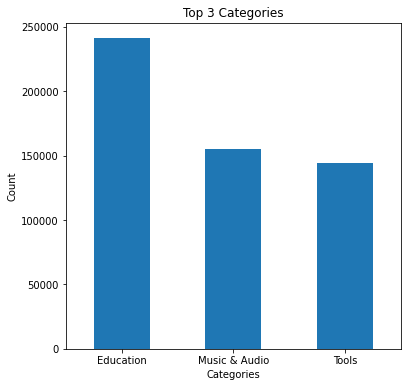

In [26]:
top3cat=df.Category.value_counts().head(3)
top3cat.plot(kind='bar', figsize=(6,6))
plt.title("Top 3 Categories")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=0)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Arcade'),
  Text(3, 0, 'Art & Design'),
  Text(4, 0, 'Auto & Vehicles'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Board'),
  Text(7, 0, 'Books & Reference'),
  Text(8, 0, 'Business'),
  Text(9, 0, 'Card'),
  Text(10, 0, 'Casino'),
  Text(11, 0, 'Casual'),
  Text(12, 0, 'Comics'),
  Text(13, 0, 'Communication'),
  Text(14, 0, 'Dating'),
  Text(15, 0, 'Education'),
  Text(16, 0, 'Educational'),
  Text(17, 0, 'Entertainment'),
  Text(18, 0, 'Events'),
  Text(19, 0, 'Finance'),
  Text(20, 0, 'Food & Drink'),
  Text(21, 0, 'Health & Fitness'),
  Text(22, 0, 'House & Home'),
  Text(23, 0, 'Libraries & Demo'),
  Text(24, 0, 'Lifestyle'),
  Text(25, 0, 'Maps & Navigation'),
  Text(26, 0, 'Medical'),
  Text(27, 0, 'Musi

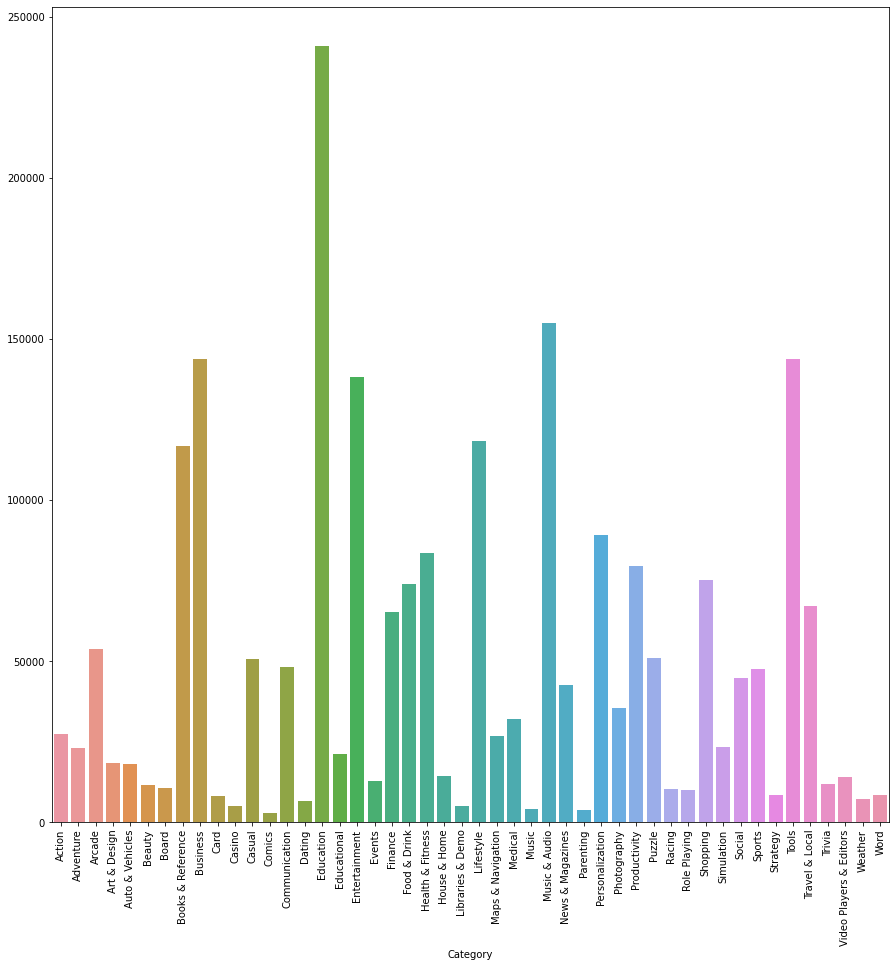

In [27]:
category_rating = df.groupby(['Category'])['Installs'].count()
plt.figure(figsize=(15,15))
sns.barplot(category_rating.index, category_rating.values)
plt.xticks(rotation=90)

This graph shows us that the educational category is rated the most in terms of the rating counts.
This clearly shows that the customers that install the educational apps are much likely to give a review.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

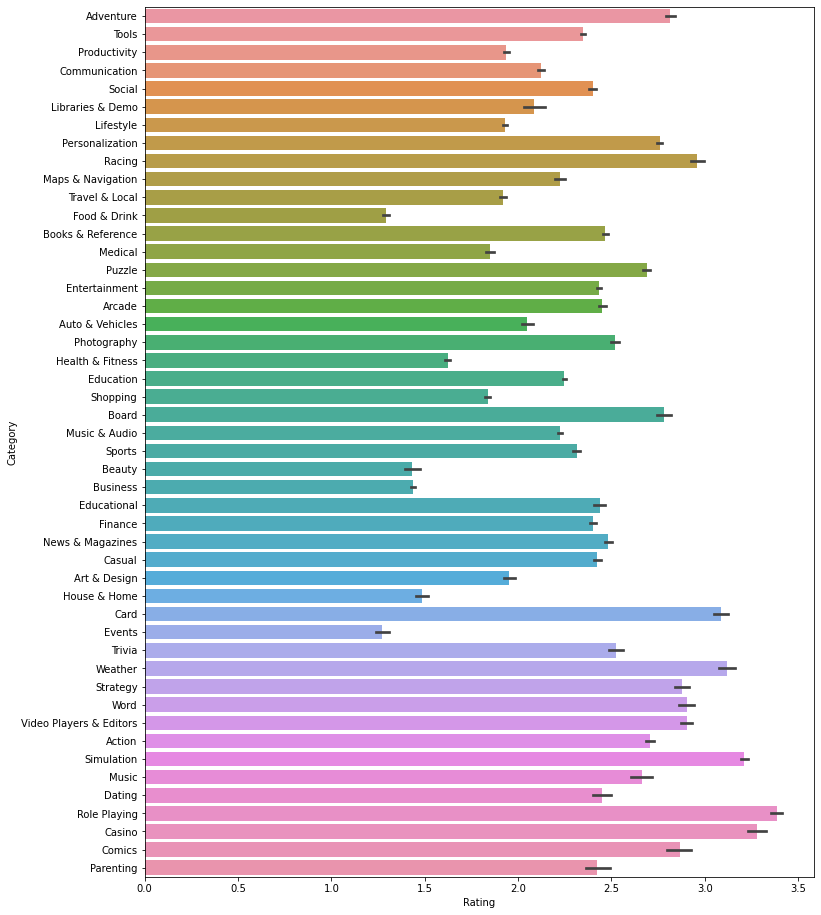

In [28]:
plt.figure(figsize=(12,16))
sns.barplot(x=df['Rating'], y=df.Category)

This graph shows us that on an average basis the Role Playing app type have the highest rating.

<AxesSubplot:xlabel='MaximumInstalls', ylabel='RatingCount'>

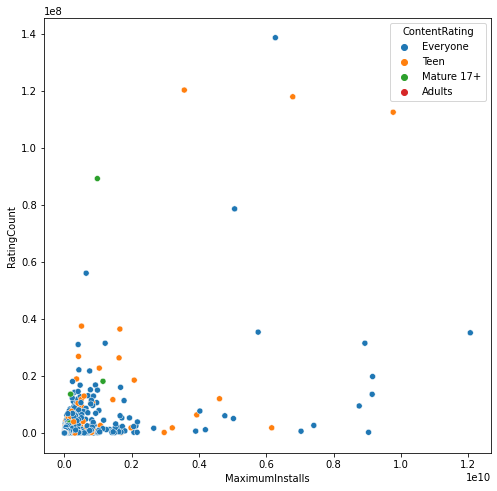

In [29]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='MaximumInstalls',y='RatingCount',data=df,hue='ContentRating')

This scatterplot shows us that when we exclude everyone and only focus on teen, matures and adult we can see that teens have much engagement in terms of download and rating count.

<AxesSubplot:xlabel='Rating', ylabel='Count'>

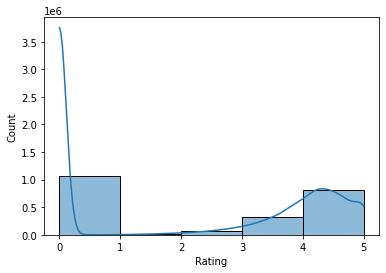

In [30]:
sns.histplot(df.Rating,kde=True,bins=5)

Most people does not give a rating. 
But one more thing that comes out from this graph as well is that people tend to give 4+ rating the most. 

In [31]:
df.corr()

,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Price,AdSupported,InAppPurchases,EditorsChoice
Rating,1.000000,0.013038,0.011214,0.011214,0.012615,-0.003674,0.160502,0.153821,0.019485
RatingCount,0.013038,1.000000,0.545281,0.545281,0.547571,-0.000411,0.005294,0.025737,0.137311
Installs,0.011214,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002249,0.014179,0.059932
MinimumInstalls,0.011214,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002249,0.014179,0.059932
MaximumInstalls,0.012615,0.547571,0.954037,0.954037,1.000000,-0.000515,0.002881,0.016100,0.064206
Price,-0.003674,-0.000411,-0.000461,-0.000461,-0.000515,1.000000,-0.034280,-0.002636,0.000503
AdSupported,0.160502,0.005294,0.002249,0.002249,0.002881,-0.034280,1.000000,0.138308,0.005701
InAppPurchases,0.153821,0.025737,0.014179,0.014179,0.016100,-0.002636,0.138308,1.000000,0.046077
EditorsChoice,0.019485,0.137311,0.059932,0.059932,0.064206,0.000503,0.005701,0.046077,1.000000


<AxesSubplot:>

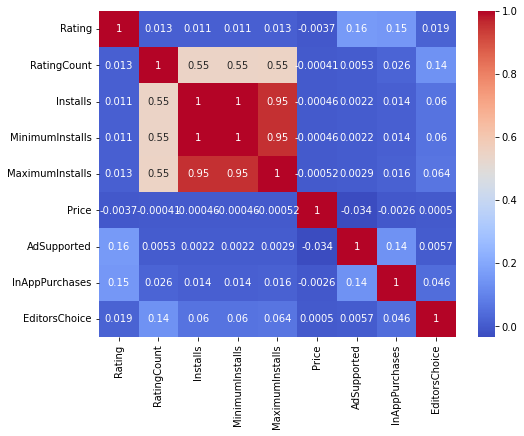

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

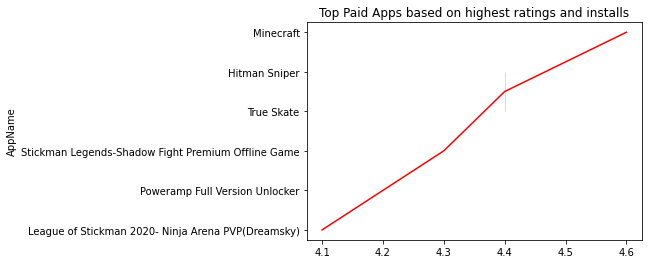

In [33]:
paid_apps = df[(df.Type=='Paid') & (df.Installs == 5000000) | ((df.Type=='Paid') & (df.Installs == 10000000))]
paid_apps = paid_apps.groupby(['AppName'])['Rating'].max().sort_values(ascending=False)
paid_apps = paid_apps.head(10)
plt.title("Top Paid Apps based on highest ratings and installs")

ax = sns.lineplot(x=paid_apps.values,y=paid_apps.index,color='Red');


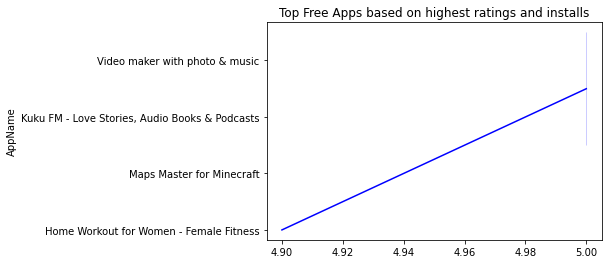

In [34]:
free_apps = df[(df.Type=='Free') & (df.Installs == 5000000) | ((df.Type=='Free') & (df.Installs == 10000000))]
free_apps = free_apps.groupby(['AppName'])['Rating'].max().sort_values(ascending=False)
free_apps = free_apps.head(5)
plt.title("Top Free Apps based on highest ratings and installs")

ax = sns.lineplot(x=free_apps.values,y=free_apps.index,color='blue');

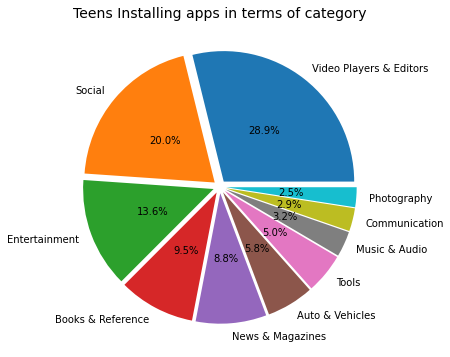

In [35]:
TeenCatPre= df[(df.ContentRating=='Teen')]
TeenCatPre= TeenCatPre.groupby(['Category'])['MaximumInstalls'].max().sort_values(ascending=False)
TeenCatPre= TeenCatPre.head(10)
pie, ax = plt.subplots(figsize=[10,6])
labels = TeenCatPre.keys()
plt.pie(x=TeenCatPre, autopct="%.1f%%", explode=[0.05]*10, labels=labels, pctdistance=0.5)
plt.title("Teens Installing apps in terms of category", fontsize=14);
#print("Rest of the category Have a low significance so they are not included.")

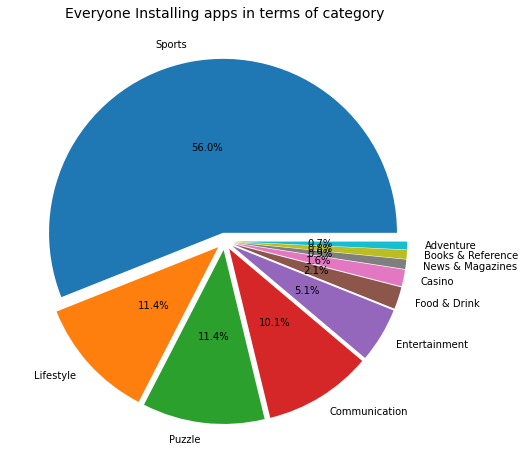

In [36]:
AdultsCatPre= df[(df.ContentRating=='Adults')]
AdultsCatPre= AdultsCatPre.groupby(['Category'])['MaximumInstalls'].max().sort_values(ascending=False)
AdultsCatPre= AdultsCatPre.head(10)
pie, ax = plt.subplots(figsize=[12,8])
labels = AdultsCatPre.keys()
plt.pie(x=AdultsCatPre, autopct="%.1f%%", explode=[0.05]*10, labels=labels, pctdistance=0.5)
plt.title("Everyone Installing apps in terms of category", fontsize=14);

## Act

**Q1. What category is preferred the most.**  
*Education category is preffered the most. We came to this conclusion after viewing the installation rate and comparing with other categories.*  
**Q2. What factors are responsible for higher app rating by coutomers.**  
*Factors like AdSupport and InappPurchases are correlated to app rating. So we can say that if the app provides customer support and have subscription plans we can engage more customers. 
We can also see from the same graph that the editor's choice plays a important role as well. With high editor choice we can see high ratings count and high installs.*   
**Q3. What features can be added to a educational app to engage more teen students.**  
*The maximum app install teen is doing is from video player and editor, social and entertainment category. So if a educational app want to maximize their engagement among teens, they can include:*  
1. Video lectures to have an escene of video player and editor category.
2. Chat groups where teens can share their views and ask for help. This will cover some features of social category.
3. Short educational videos like youtube shorts and instagram reels can also be added.  
**Q4. What kind of apps should target adults.**  
*We can see that from top 10 categories of adult choices the most installed is the sports category. This proved that adults are much into sports. Combinig Lifestyle and communication as one we can say they also have a significant number.*   
**Q5. What are the top 5 paid apps in terms of rating and installs.**     
                     ![Graph](./out.png)  